In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [5]:
import os
os.listdir('./img/')

['B04_RED.tif', 'B08_NIR.tif']

In [6]:
#import bands as separate 1 band raster
band4 = rasterio.open('./img/B04_RED.tif') #red
band8 = rasterio.open('./img/B08_NIR.tif') #nir

In [7]:
#number of raster rows
band4.height

2574

In [8]:
#number of raster columns
band4.width

3199

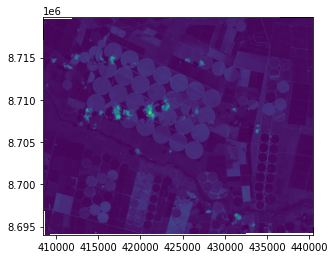

<AxesSubplot:>

In [9]:
#plot band 
plot.show(band4)

In [10]:
#type of raster byte
band4.dtypes[0]

'uint16'

In [11]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32723)

In [12]:
#raster transform parameters
band4.transform

Affine(10.0, 0.0, 408440.0,
       0.0, -10.0, 8719760.0)

In [13]:
#raster values as matrix array
band4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

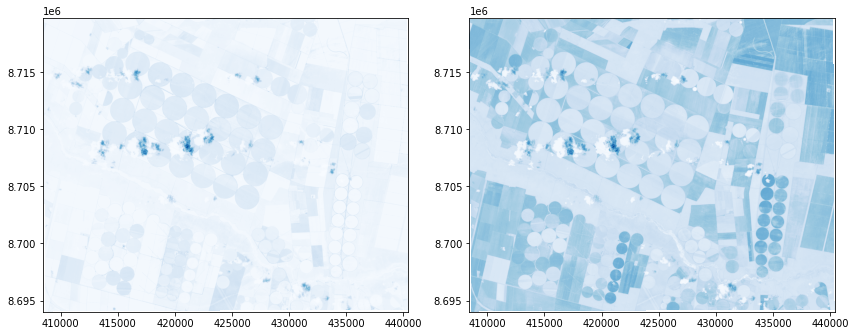

In [14]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band8, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [15]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band8.read(1).astype('float64')

In [16]:
nir

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
#ndvi calculation, empty cells or nodata cells are reported as 0
ndvi=np.where(
    (nir + red) == 0., 
    0, 
    (nir - red) / (nir + red))
ndvi[:5,:5]

<ipython-input-24-b9d721ae09eb>:5: RuntimeWarning: invalid value encountered in true_divide
  (nir - red) / (nir + red))


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [18]:
#export ndvi image
ndviImage = rasterio.open('./img/ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

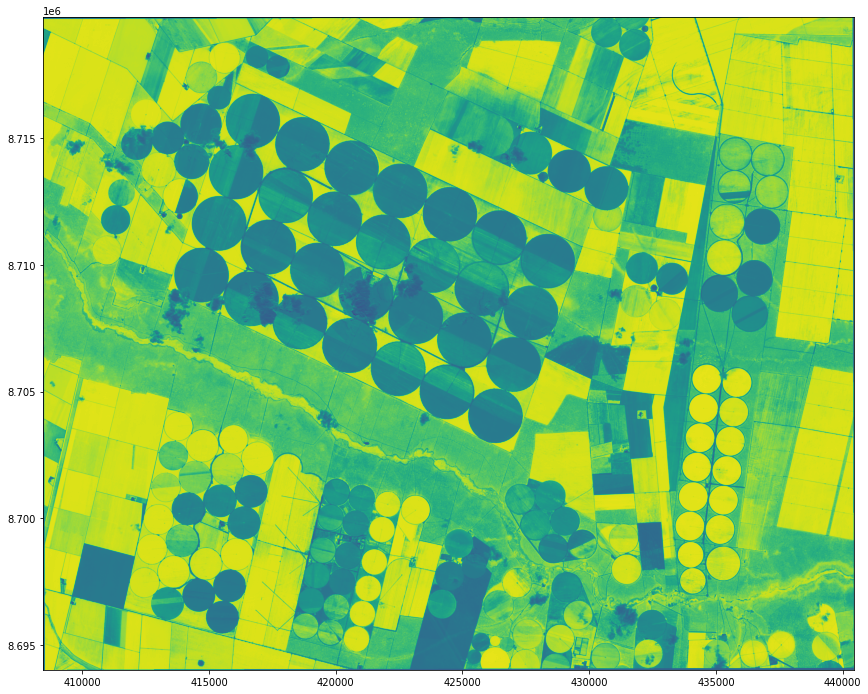

<AxesSubplot:>

In [19]:
#plot ndvi
ndvi = rasterio.open('./img/ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)